<a href="https://colab.research.google.com/github/Vijayak08/Heart-Disease-Prediction/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd

In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/slmsshk/pima-indians-diabetes.data.csv/main/pima-indians-diabetes.csv",header=None)


In [18]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
df.dtypes


0      int64
1      int64
2      int64
3      int64
4      int64
5    float64
6    float64
7      int64
8      int64
dtype: object

In [20]:
df.shape

(768, 9)

In [21]:
df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [22]:
y = df[8]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: 8, Length: 768, dtype: int64

In [23]:
x = df.drop(8,axis=1)
x

,0,1,2,3,4,5,6,7
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [24]:
#model Building
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [25]:
x_train

,0,1,2,3,4,5,6,7
224,1,100,66,15,56,23.6,0.666,26
510,12,84,72,31,0,29.7,0.297,46
622,6,183,94,0,0,40.8,1.461,45
472,0,119,66,27,0,38.8,0.259,22
444,4,117,62,12,0,29.7,0.380,30
...,...,...,...,...,...,...,...,...
205,5,111,72,28,0,23.9,0.407,27
575,1,119,44,47,63,35.5,0.280,25
239,0,104,76,0,0,18.4,0.582,27
219,5,112,66,0,0,37.8,0.261,41


In [26]:
y_train

224    0
510    1
622    0
472    0
444    1
      ..
205    0
575    0
239    0
219    1
181    0
Name: 8, Length: 614, dtype: int64

In [27]:
x_test

,0,1,2,3,4,5,6,7
641,4,128,70,0,0,34.3,0.303,24
605,1,124,60,32,0,35.8,0.514,21
411,1,112,72,30,176,34.4,0.528,25
603,7,150,78,29,126,35.2,0.692,54
71,5,139,64,35,140,28.6,0.411,26
...,...,...,...,...,...,...,...,...
303,5,115,98,0,0,52.9,0.209,28
273,1,71,78,50,45,33.2,0.422,21
20,3,126,88,41,235,39.3,0.704,27
237,0,179,90,27,0,44.1,0.686,23


In [28]:
y_test

641    0
605    0
411    0
603    1
71     0
      ..
303    1
273    0
20     0
237    1
176    0
Name: 8, Length: 154, dtype: int64

In [29]:
from keras.models import Sequential
from keras.layers import Dense

In [30]:
#create Model
model = Sequential()
model.add(Dense(25, input_dim= 8,activation="relu")) #1st hidden layer
model.add(Dense(16, activation="relu")) #2nd hidden layer
model.add(Dense(18, activation="relu")) #3rd hidden layer
model.add(Dense(12, activation="relu")) #4th hidden layer
model.add(Dense(23, activation="relu")) #5th hidden layer
model.add(Dense(1, activation="sigmoid")) #output layer



In [31]:
#compile Model
model.compile(loss = "binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                225       
                                                                 
 dense_1 (Dense)             (None, 16)                416       
                                                                 
 dense_2 (Dense)             (None, 18)                306       
                                                                 
 dense_3 (Dense)             (None, 12)                228       
                                                                 
 dense_4 (Dense)             (None, 23)                299       
                                                                 
 dense_5 (Dense)             (None, 1)                 24        
                                                                 
Total params: 1498 (5.85 KB)
Trainable params: 1498 (5.8

In [41]:
#train the model

import tensorflow as tf

trained_model = model.fit(x_train,y_train,validation_split=0.2,epochs = 180,batch_size=32)

Epoch 1/180
16/16 [==============================] - 0s 8ms/step - loss: 0.2028 - accuracy: 0.9348 - val_loss: 2.1082 - val_accuracy: 0.6504
Epoch 2/180
16/16 [==============================] - 0s 5ms/step - loss: 0.1761 - accuracy: 0.9491 - val_loss: 2.1139 - val_accuracy: 0.6992
Epoch 3/180
16/16 [==============================] - 0s 5ms/step - loss: 0.2391 - accuracy: 0.9409 - val_loss: 2.3591 - val_accuracy: 0.6341
Epoch 4/180
16/16 [==============================] - 0s 4ms/step - loss: 0.2994 - accuracy: 0.9165 - val_loss: 1.9684 - val_accuracy: 0.6667
Epoch 5/180
16/16 [==============================] - 0s 5ms/step - loss: 0.1928 - accuracy: 0.9246 - val_loss: 2.5540 - val_accuracy: 0.6911
Epoch 6/180
16/16 [==============================] - 0s 5ms/step - loss: 0.3156 - accuracy: 0.8921 - val_loss: 1.9675 - val_accuracy: 0.6504
Epoch 7/180
16/16 [==============================] - 0s 4ms/step - loss: 0.3890 - accuracy: 0.8717 - val_loss: 1.8426 - val_accuracy: 0.6911
Epoch 8/180
1

In [43]:
trained_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [44]:
#evaluate the model on test data

scores = model.evaluate(x_test,y_test)
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

5/5 [==============================] - 0s 4ms/step - loss: 2.3567 - accuracy: 0.7143
accuracy: 71.43%


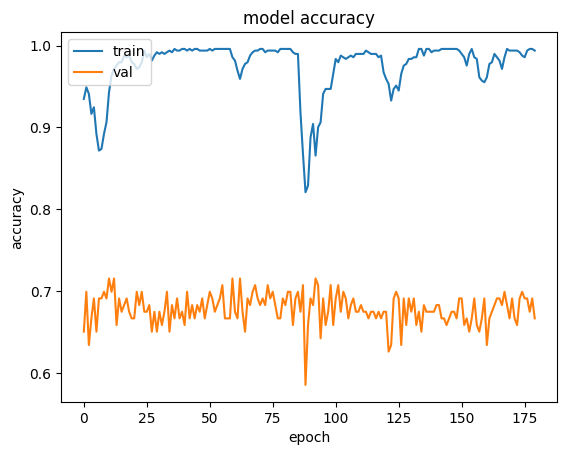

In [45]:
#Summarise History For Accuracy

import matplotlib.pyplot as plt

plt.plot(trained_model.history['accuracy']) #training Accuracy
plt.plot(trained_model.history['val_accuracy']) #test Accuracy
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

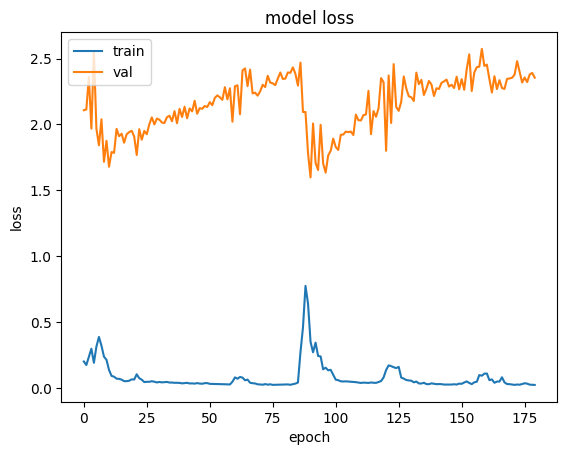

In [46]:
#Summarize History For Loss

plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()